In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Check if everything is working
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# loading the dataset
data = pd.read_csv(r"C:\Users\HP\Documents\Projects\sales-prediction-project\data\train.csv",low_memory=False)
print(data.head())  # View the first few rows
print(data.info())  # Check data types and missing values

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 n

In [3]:
# loading the dataset
sdata = pd.read_csv(r"C:\Users\HP\Documents\Projects\sales-prediction-project\data\store.csv",low_memory=False)
print(sdata.head())  # View the first few rows
print(sdata.info())  # Check data types and missing values

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [4]:
# preprocessing the data

# check if there are any missing data
print(data.isnull().sum())  # Shows the number of missing values per column

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [5]:
# Convert date column to datetime if applicable
data['Date'] = pd.to_datetime(data['Date'])

# Create new features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday

print(data.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  Weekday  
0              1  2015      7   31        4  
1              1  2015      7   31        4  
2              1  2015      7   31        4  
3              1  2015      7   31        4  
4              1  2015      7   31        4  


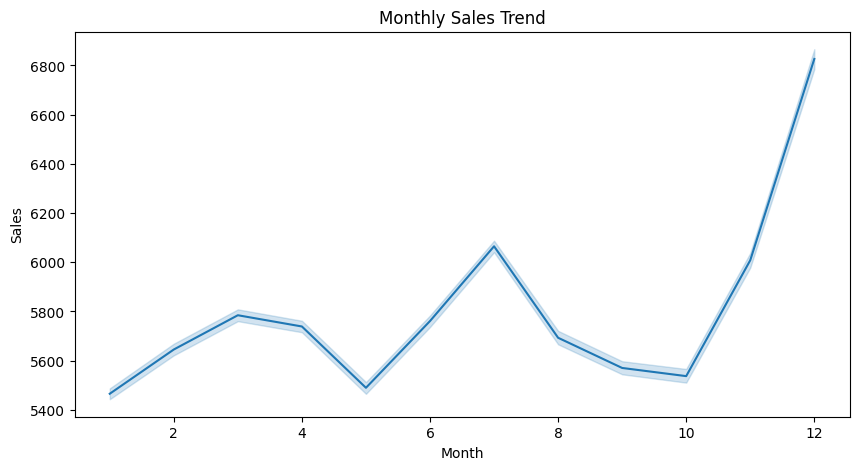

In [6]:
# Sales trend over time

plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Sales', data=data)
plt.title('Monthly Sales Trend')
plt.show()

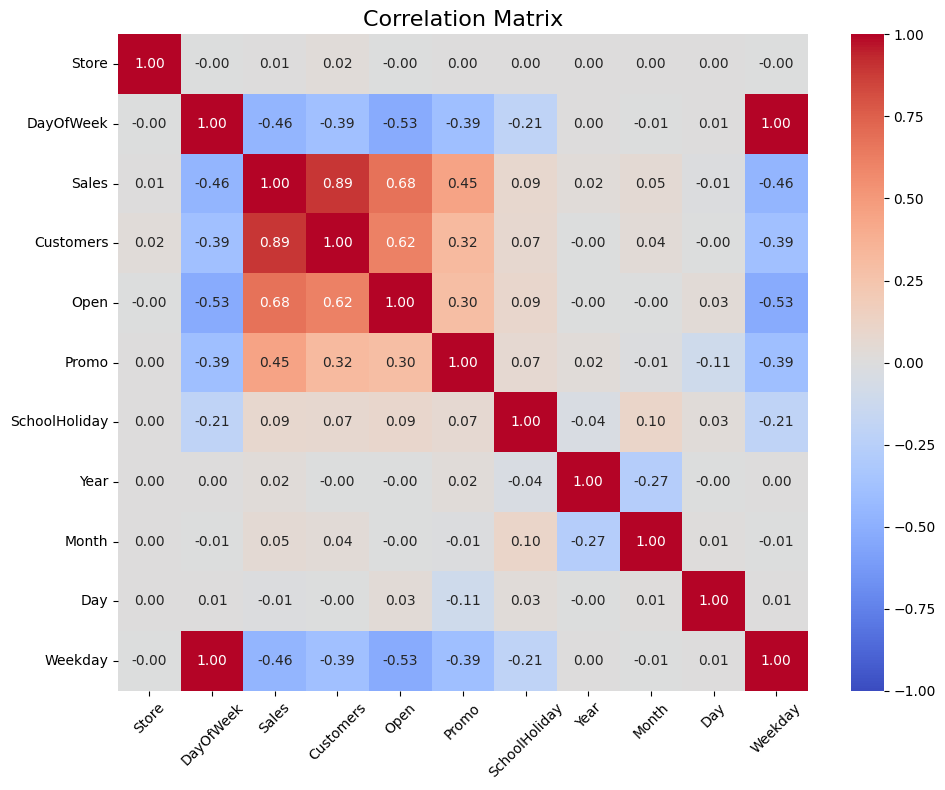

In [7]:
# Correlation

numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(
    numeric_data.corr(),        # Correlation matrix
    annot=True,                 # Show values on the heatmap
    fmt=".2f",                  # Limit to 2 decimal places
    cmap="coolwarm",            # Diverging color palette
    vmin=-1, vmax=1,            # Set range of values
    annot_kws={"size": 10}      # Set annotation font size
)
plt.title('Correlation Matrix', fontsize=16)  # Title with larger font
plt.xticks(fontsize=10, rotation=45)          # Rotate x-axis labels for better fit
plt.yticks(fontsize=10, rotation=0)           # Keep y-axis labels horizontal
plt.tight_layout()                            # Adjust layout to fit everything
plt.show()

In [8]:
# Print sorted correlations with 'Sales'

target_corr = numeric_data.corr()['Sales'].sort_values(ascending=False)
print(target_corr) 

Sales            1.000000
Customers        0.894711
Open             0.678472
Promo            0.452345
SchoolHoliday    0.085124
Month            0.048768
Year             0.023519
Store            0.005126
Day             -0.011612
Weekday         -0.462125
DayOfWeek       -0.462125
Name: Sales, dtype: float64


In [9]:
# Split Data into Features and Target

# Features (X) and target (y)
X = data.drop(columns=['Sales'])  # Drop the target column
y = data['Sales']  # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets are ready!")

Training and testing sets are ready!


In [10]:
print(X_train.shape)
print(y_train.shape)

(813767, 12)
(813767,)


In [11]:
# Ensure Consistent Data Types

# Check that all features in X_train and X_test are numeric
print(X_train.dtypes) 

# If there are categorical features, encode them using pd.get_dummies
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
Year                      int32
Month                     int32
Day                       int32
Weekday                   int32
dtype: object


In [12]:
# Handle datetime64 Column 

# If there's a datetime64 column called 'Date', extract numeric components
X_train['Year'] = X_train['Date'].dt.year
X_train['Month'] = X_train['Date'].dt.month
X_train['Day'] = X_train['Date'].dt.day
X_train['Weekday'] = X_train['Date'].dt.weekday

# Drop the original 'Date' column
X_train = X_train.drop(columns=['Date'])

X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['Day'] = X_test['Date'].dt.day
X_test['Weekday'] = X_test['Date'].dt.weekday
X_test = X_test.drop(columns=['Date'])

In [13]:
# Ensure All Features Are Numeric

print(X_train.dtypes)
print(X_test.dtypes)

# Align columns between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Store             int64
DayOfWeek         int64
Customers         int64
Open              int64
Promo             int64
SchoolHoliday     int64
Year              int32
Month             int32
Day               int32
Weekday           int32
StateHoliday_a     bool
StateHoliday_b     bool
StateHoliday_c     bool
dtype: object
Store             int64
DayOfWeek         int64
Customers         int64
Open              int64
Promo             int64
SchoolHoliday     int64
Year              int32
Month             int32
Day               int32
Weekday           int32
StateHoliday_a     bool
StateHoliday_b     bool
StateHoliday_c     bool
dtype: object


In [14]:
# Convert boolean columns to integers

X_train = X_train.astype(int, errors='ignore')  
X_test = X_test.astype(int, errors='ignore')

In [15]:
# Ensure All Features Are Numeric

print(X_train.dtypes)
print(X_test.dtypes)

# Align columns between train and test sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Store             int64
DayOfWeek         int64
Customers         int64
Open              int64
Promo             int64
SchoolHoliday     int64
Year              int64
Month             int64
Day               int64
Weekday           int64
StateHoliday_a    int64
StateHoliday_b    int64
StateHoliday_c    int64
dtype: object
Store             int64
DayOfWeek         int64
Customers         int64
Open              int64
Promo             int64
SchoolHoliday     int64
Year              int64
Month             int64
Day               int64
Weekday           int64
StateHoliday_a    int64
StateHoliday_b    int64
StateHoliday_c    int64
dtype: object


In [16]:
# Train the Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Linear Regression): {mae}")

Mean Absolute Error (Linear Regression): 985.4346662320711


In [17]:
# Train an XGBoost model

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Absolute Error (XGBoost): {mae_xgb}")

Mean Absolute Error (XGBoost): 673.8715209960938


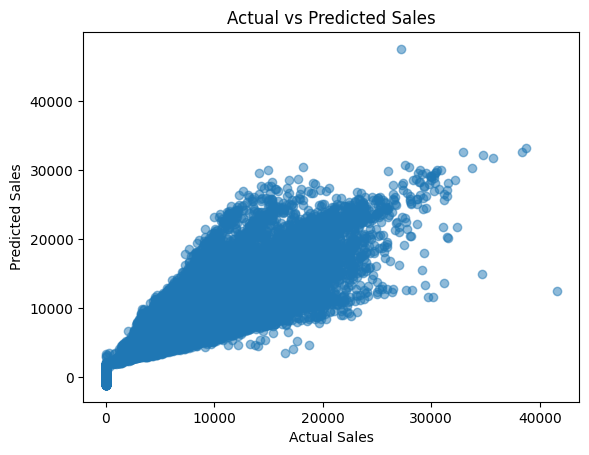

In [18]:
# Plot using Linear Regression Model

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

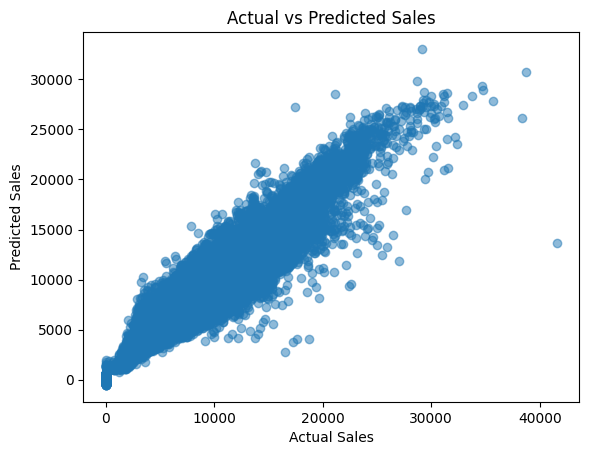

In [19]:
# Plot using XGBoost Model

plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

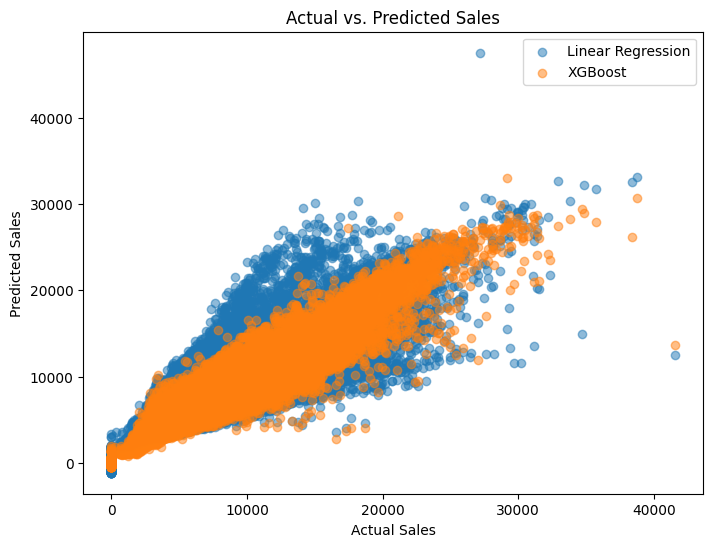

In [20]:
# Compare both Linear Regression and XGBoost models

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()